<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Kaggle_Heart_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Kaggle/heart.csv")

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.shape

(918, 12)

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df['RestingECG'].nunique()

3

In [ ]:
df['ExerciseAngina'].nunique()

2

In [ ]:
df['ChestPainType'].nunique()

4

In [ ]:
df['ST_Slope'].nunique()

3

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

In [ ]:
df['RestingECG'] = LE.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = LE.fit_transform(df['ExerciseAngina'])
df['ChestPainType'] = LE.fit_transform(df['ChestPainType'])
df['ST_Slope'] = LE.fit_transform(df['ST_Slope'])
df['Sex']=  LE.fit_transform(df['Sex'])

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
x=df.iloc[:,0:10]
x.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak
0,40,1,1,140,289,0,1,172,0,0.0
1,49,0,2,160,180,0,1,156,0,1.0


In [ ]:
y=df["HeartDisease"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40,stratify=y)

In [ ]:
x_train.shape

(688, 10)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogReg= LogisticRegression()


In [ ]:
LogReg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred=LogReg.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
loss = log_loss(y_test,y_pred)

In [ ]:
cm

array([[ 68,  35],
       [ 22, 105]])

In [ ]:
score

0.7521739130434782

In [ ]:
loss

8.559731480086807

In [ ]:
log_test_score = []
random = range(1, 100)

In [ ]:
for i in random:
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = i)
  LogReg =LogisticRegression().fit(x_train,y_train)
  y_pred_test= LogReg.predict(x_test)
  log_test_score.append(accuracy_score(y_test,y_pred_test).round(2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print(log_test_score)

[0.83, 0.83, 0.83, 0.83, 0.85, 0.83, 0.84, 0.79, 0.83, 0.78, 0.78, 0.79, 0.8, 0.81, 0.83, 0.8, 0.83, 0.78, 0.79, 0.85, 0.85, 0.82, 0.85, 0.81, 0.87, 0.81, 0.81, 0.82, 0.8, 0.84, 0.8, 0.81, 0.8, 0.78, 0.81, 0.8, 0.87, 0.84, 0.81, 0.83, 0.82, 0.83, 0.8, 0.8, 0.8, 0.81, 0.8, 0.83, 0.8, 0.83, 0.82, 0.86, 0.82, 0.84, 0.83, 0.8, 0.83, 0.81, 0.83, 0.82, 0.81, 0.8, 0.8, 0.84, 0.86, 0.81, 0.84, 0.8, 0.77, 0.76, 0.79, 0.82, 0.86, 0.8, 0.81, 0.81, 0.83, 0.79, 0.78, 0.85, 0.79, 0.83, 0.81, 0.82, 0.78, 0.8, 0.81, 0.84, 0.83, 0.81, 0.82, 0.85, 0.84, 0.85, 0.82, 0.8, 0.83, 0.83, 0.8]


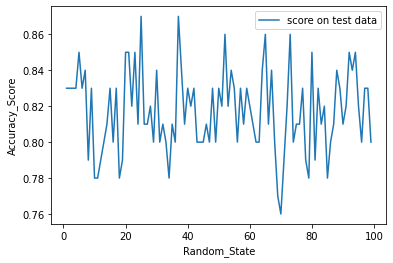

In [ ]:
import matplotlib.pyplot as plt
plt.plot(random, log_test_score, label = "score on test data")
plt.ylabel("Accuracy_Score")
plt.xlabel("Random_State")
plt.legend()
plt.show()

**Let's try to improve the performance using Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt= DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm=confusion_matrix(y_pred,y_test)

In [ ]:
cm

array([[78, 25],
       [39, 88]])

In [ ]:
score=accuracy_score(y_test,y_pred)

In [ ]:
score

0.7217391304347827

In [ ]:
pip install graphviz

In [ ]:
from sklearn import tree

In [ ]:
import graphviz

In [ ]:
training_accuracy =[]
test_accuracy=[]

In [ ]:
md= range(1,12)

In [ ]:
for i in md:
  dt=DecisionTreeClassifier(criterion = "gini", max_depth =i)
  dt.fit(x_train,y_train)
  y_pred_train = dt.predict(x_train)
  y_pred_test = dt.predict(x_test)
  training_accuracy.append(accuracy_score(y_train, y_pred_train.round(2)))
  test_accuracy.append(accuracy_score(y_test, y_pred_test.round(2)))

In [ ]:
print(training_accuracy)

[0.7223837209302325, 0.8037790697674418, 0.813953488372093, 0.8517441860465116, 0.8662790697674418, 0.8968023255813954, 0.9244186046511628, 0.9418604651162791, 0.9491279069767442, 0.9636627906976745, 0.9738372093023255]


In [ ]:
print(test_accuracy)

[0.7565217391304347, 0.7695652173913043, 0.7869565217391304, 0.7695652173913043, 0.7652173913043478, 0.7260869565217392, 0.7565217391304347, 0.7347826086956522, 0.7391304347826086, 0.7478260869565218, 0.7347826086956522]


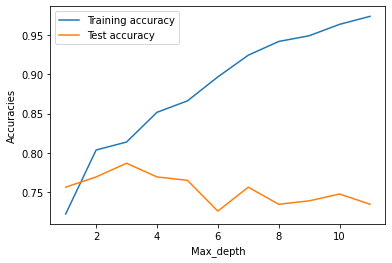

In [ ]:
import matplotlib.pyplot as plt
plt.plot(md, training_accuracy, label = "Training accuracy")
plt.plot(md, test_accuracy, label = "Test accuracy")
plt.ylabel("Accuracies")
plt.xlabel("Max_depth")
plt.legend()

In [ ]:
from sklearn.ensemble import BaggingClassifier


In [ ]:
Bag= BaggingClassifier()

In [ ]:
Bag

BaggingClassifier()

In [ ]:
Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9,
                  n_estimators=500, random_state=10)


In [ ]:
Bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9,
                  n_estimators=500, random_state=10)

In [ ]:
y_pred= Bag.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
dt_score=accuracy_score(y_test,y_pred)

In [ ]:
dt_score

0.782608695652174

In [ ]:
import numpy as np


In [ ]:
test_error = []

In [ ]:
settings = np.arange(0.1,1,0.1)

In [ ]:
for i in settings:
  Bag= BaggingClassifier(base_estimator=dt, max_samples=i,n_estimators=500, random_state =10)
  Bag.fit(x_train,y_train)
  y_pred= Bag.predict(x_test)
  test_error.append(accuracy_score(y_test,y_pred).round(2))


In [ ]:
print(test_error)

[0.81, 0.81, 0.78, 0.79, 0.78, 0.78, 0.77, 0.78, 0.78]


<function matplotlib.pyplot.legend>

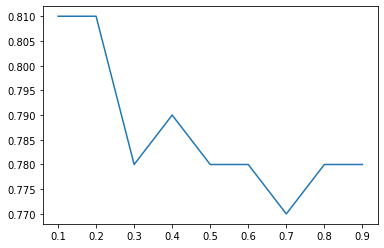

In [ ]:
import matplotlib.pyplot as plt
plt.plot(settings,test_error, label = "Test_error")
plt.legend

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
gbc

GradientBoostingClassifier()

In [ ]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred= gbc.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
gbc_score = accuracy_score(y_pred,y_test)

In [ ]:
gbc_score

0.8043478260869565

In [ ]:
import numpy as np


In [ ]:
np.arange(0.01,0.2,0.001)

array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128, 0.129, 0.13 , 0.131, 0.132, 0.133, 0.134, 0.135,
       0.136, 0.137,

In [ ]:
range(1,200)

range(1, 200)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = {"Learning Rate": np.arange(0.01,0.2,0.001),
        "n_estimators": range(1, 200)}
grid_cv=GridSearchCV(estimator = GradientBoostingClassifier(),param_grid,scoring="neg_log_loss")
grid_cv.fit(x_train,y_train)
abs(grid_cv.best_score_)
grid_cv.best_params_


SyntaxError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
df.shape

(918, 12)

In [ ]:
model= Sequential()
model.add(Dense(12,activation='relu',name='input'))
model.add(Dense(18,activation='relu',name='hidden'))
model.add(Dense(1,name='output'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['Accuracy'])

In [ ]:
model.fit(x =x_train, y= y_train, validation_data=(x_test,y_test), batch_size=100, epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 26ms/step - loss: 8.5420 - Accuracy: 0.4462 - val_loss: 8.5173 - val_Accuracy: 0.4478
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 8.5420 - Accuracy: 0.4462 - val_loss: 8.5173 - val_Accuracy: 0.4478
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 8.5420 - Accuracy: 0.4462 - val_loss: 8.5173 - val_Accuracy: 0.4478
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 8.5420 - Accuracy: 0.4462 - val_loss: 8.5173 - val_Accuracy: 0.4478
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 8.5420 - Accuracy: 0.4462 - val_loss: 8.5173 - val_Accuracy: 0.4478
Epoch 6/100
7/7 [==============================] - 0s 20ms/step - loss: 8.5420 - Accuracy: 0.4462 - val_loss: 8.5173 - val_Accuracy: 0.4478
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 8.5420 - Accuracy: 0.4462 - val_loss: 8.5173 - val_Accuracy: 0.4478
Epoch 8/100
7/7 [===